In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.options.display.max_columns = 999

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
df['target']=cancer['target']

In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### change benign to 0 and malignant to 1

In [11]:
def correct_label(target):
    if target == 0:
        return 1
    else:
        return 0

In [12]:
df['target']=df['target'].apply(correct_label)

# EDA

Text(0.5,0,'Target')

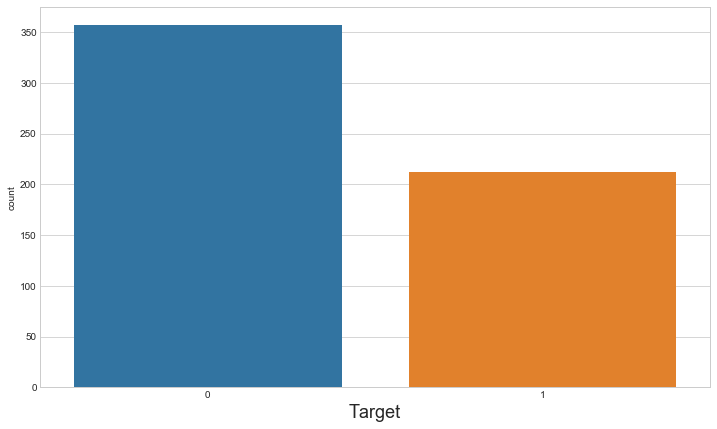

In [44]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df['target'])
plt.xlabel('Target', fontsize=18)

### There are Class Distribution: 212 - Malignant, 357 - Benign

Text(0.5,1,'Worst Area vs. Worst Perimeter by Target')

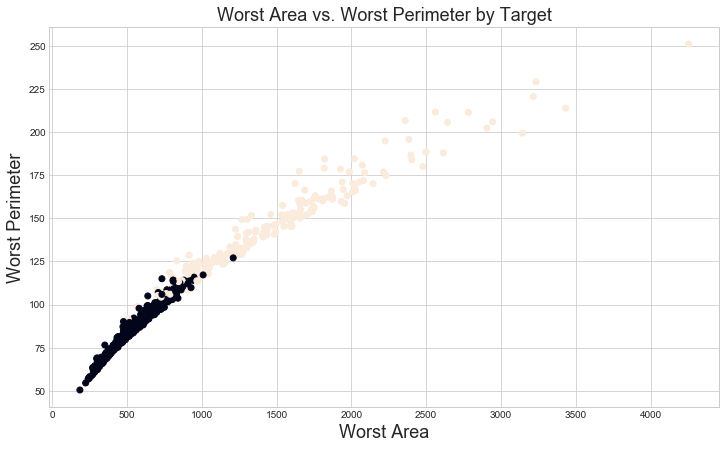

In [14]:
plt.figure(figsize=(12,7))
plt.scatter(df['worst area'], df['worst perimeter'], c=df['target'])
plt.xlabel('Worst Area', fontsize=18)
plt.ylabel('Worst Perimeter', fontsize=18)
plt.title('Worst Area vs. Worst Perimeter by Target',fontsize=18)


Text(22.1812,0.5,'Worst Area')

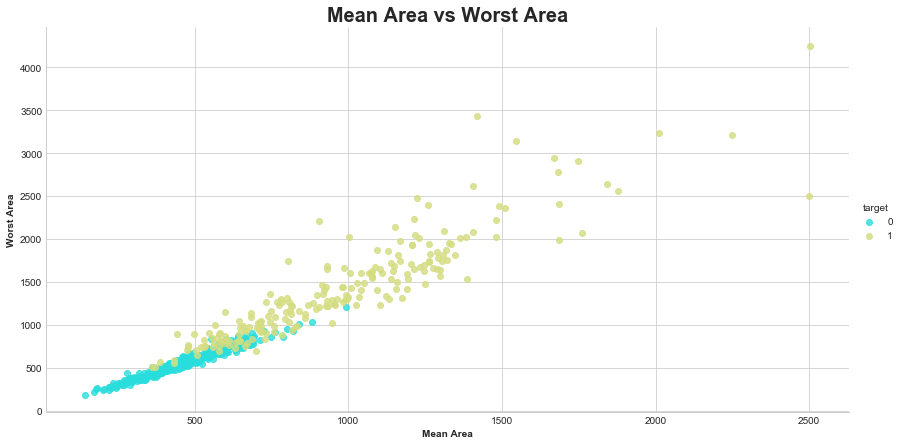

In [15]:
sns.lmplot(x='mean area', y='worst area',data=df, hue='target',fit_reg=False, size=6, aspect=2, palette='rainbow')

ax = plt.gca()
ax.set_title("Mean Area vs Worst Area", fontdict={'fontsize':20, 'fontweight':'bold'})
ax.set_xlabel("Mean Area", fontdict={'fontsize':10, 'fontweight':'bold'})
ax.set_ylabel("Worst Area", fontdict={'fontsize':10, 'fontweight':'bold'})

In [16]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Text(0.5,1,'KDE plot for Average perimeter vs Worst Radius depend on Type')

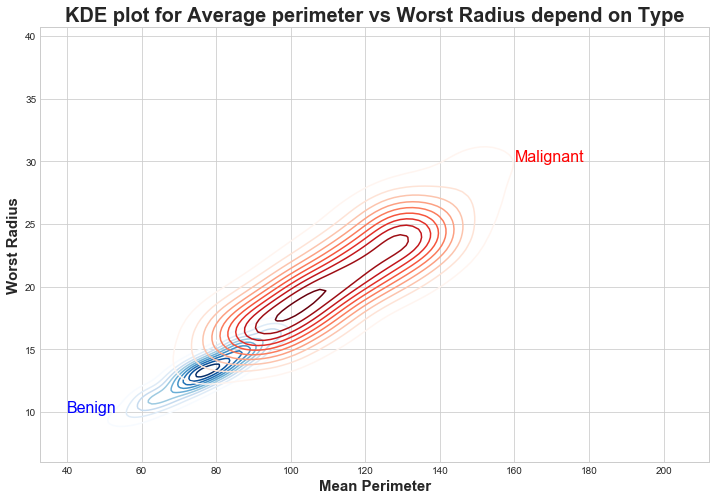

In [17]:
# Set up dataframe for each case
benign=df[df['target']==0]
malignant=df[df['target']==1]

# Set UP figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.kdeplot(benign['mean perimeter'], benign['worst radius'],
                 cmap="Blues", shade_lowest=False)
ax = sns.kdeplot(malignant['mean perimeter'], malignant['worst radius'],
                 cmap="Reds", shade_lowest=False)

# Label
ax.text(160, 30, "Malignant", size=16, color='red')
ax.text(40, 10, "Benign", size=16, color='blue')
ax.set_xlabel("Mean Perimeter", fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_ylabel("Worst Radius", fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_title("KDE plot for Average perimeter vs Worst Radius depend on Type", fontdict={'fontsize':20, 'fontweight':'bold'})

# Model

In [18]:
X=df.drop('target', axis=1)
y=df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [20]:
scaler=StandardScaler()

scaler.fit(X_train)

Xs_train=scaler.transform(X_train)
Xs_test=scaler.transform(X_test)

In [21]:
lr= LogisticRegression()

In [23]:
lr.fit(Xs_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
pred = lr.predict(Xs_test)

In [25]:
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

[[185   2]
 [  2  96]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       187
          1       0.98      0.98      0.98        98

avg / total       0.99      0.99      0.99       285



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [27]:
scaler=StandardScaler()

scaler.fit(X_train)

Xs_train=scaler.transform(X_train)
Xs_test=scaler.transform(X_test)

In [28]:
lr= LogisticRegression()
lr.fit(Xs_train, y_train)
pred = lr.predict(Xs_test)
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

[[176   1]
 [  7 101]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       177
          1       0.99      0.94      0.96       108

avg / total       0.97      0.97      0.97       285



## Two random state show different results on different cases, especially on FN, which can mean overfit.  Therefore, I will use PCA to reduce the dimensionality of a data set consisting of many variables correlated with each other.

In [29]:
pca= PCA(n_components=2)

In [31]:
pca.fit(Xs_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
X_train_pca = pca.transform(Xs_train)
X_test_pca = pca.transform(Xs_test)

In [33]:
X_train_pca.shape

(284, 2)

Text(0,0.5,'Second Principal Component')

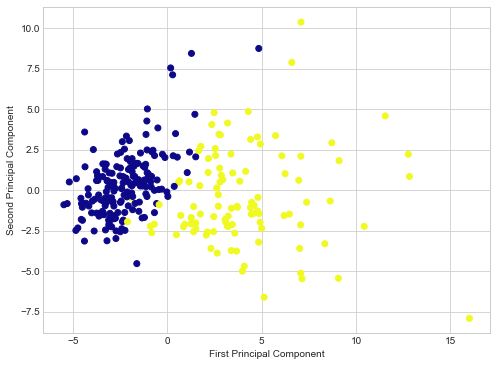

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel("Second Principal Component")

In [39]:
pca.components_

array([[ 0.21722965,  0.09449533,  0.22546641,  0.21899655,  0.14067136,
         0.23665577,  0.25433042,  0.25414306,  0.14370013,  0.05585724,
         0.20891979,  0.00372013,  0.21513981,  0.20155459,  0.02061501,
         0.17951235,  0.17273226,  0.20486809,  0.05240641,  0.10542406,
         0.22350432,  0.09826708,  0.23321296,  0.21962055,  0.13043359,
         0.21030252,  0.22399734,  0.24771691,  0.13035567,  0.123931  ],
       [-0.22332295, -0.08190814, -0.20482142, -0.22288564,  0.20323364,
         0.14827423,  0.04078217, -0.03826052,  0.20039002,  0.36563861,
        -0.12051593,  0.05491015, -0.10064009, -0.15731688,  0.21605526,
         0.211015  ,  0.15783018,  0.08616924,  0.19272194,  0.28036597,
        -0.21434395, -0.05753563, -0.19274346, -0.21857638,  0.19963746,
         0.1530342 ,  0.09089805, -0.00753179,  0.18085685,  0.28519472]])

In [40]:
df_comp=pd.DataFrame(pca.components_, columns=cancer['feature_names'])

In [41]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.217230,0.094495,0.225466,0.218997,0.140671,0.236656,0.254330,0.254143,0.14370,0.055857,0.208920,0.00372,0.21514,0.201555,0.020615,0.179512,0.172732,0.204868,0.052406,0.105424,0.223504,0.098267,0.233213,0.219621,0.130434,0.210303,0.223997,0.247717,0.130356,0.123931
1,-0.223323,-0.081908,-0.204821,-0.222886,0.203234,0.148274,0.040782,-0.038261,0.20039,0.365639,-0.120516,0.05491,-0.10064,-0.157317,0.216055,0.211015,0.157830,0.086169,0.192722,0.280366,-0.214344,-0.057536,-0.192743,-0.218576,0.199637,0.153034,0.090898,-0.007532,0.180857,0.285195


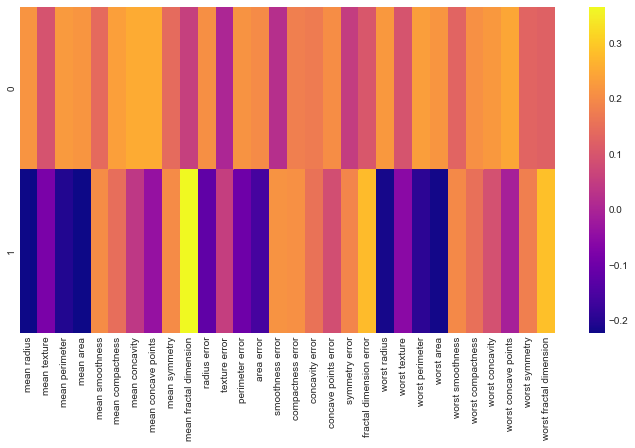

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

In [45]:
lr.fit(X_train_pca, y_train)
pred_pca = lr.predict(X_test_pca)
print(metrics.confusion_matrix(y_test, pred_pca))
print(metrics.classification_report(y_test, pred_pca))

[[167  10]
 [  8 100]]
             precision    recall  f1-score   support

          0       0.95      0.94      0.95       177
          1       0.91      0.93      0.92       108

avg / total       0.94      0.94      0.94       285



In [47]:
pca.explained_variance_ratio_

array([0.46516693, 0.19294028])